<a href="https://colab.research.google.com/github/shravanimmy/GoogleSiteMap/blob/develop/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NFL Play by Play 2009-2016 (v3).csv to NFL Play by Play 2009-2016 (v3).csv


In [ ]:
from pandas.plotting import boxplot
# modules we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read in all our data
import io
df=pd.read_csv(io.BytesIO(uploaded['NFL Play by Play 2009-2016 (v3).csv']))

# set seed for reproducibility
np.random.seed(0)
# look at the first five rows of the nfl_data file.
# I can see a handful of missing data already!
df.head()
df.info()



NameError: ignored

In [ ]:
subset_nfl_data = df.loc[:, 'Epa':'Season'].head(10)
subset_nfl_data_mean = df.loc[:, 'Epa':'Season'].head(10)
subset_nfl_data


,Epa,Airepa,Yacepa,Home_Wp_Pre,Away_Wp_Pre,Home_Wp_Post,Away_Wp_Post,Win_Prob,Wpa,Airwpa,Yacwpa,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
2,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
3,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
4,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
5,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
6,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
7,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
8,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
9,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [ ]:
# replace all NA's with 0
subset_nfl_data.fillna(0)
#fille with mean
subset_nfl_data = subset_nfl_data.fillna(subset_nfl_data.mean())
subset_nfl_data.head(10)
# replace all NA's the value that comes directly after it in the same column,
# then replace all the remaining na's with 0
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

In [ ]:
## removing outliers
from scipy import stats
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.head()

In [ ]:
subset_nfl_data = df.loc[:, 'down':'AirYards'].head()
subset_nfl_data


In [ ]:
##removing duplicate rows
subset_nfl_data.drop_duplicates()

In [ ]:
##removing duplicate values in a column
df.drop_duplicates(subset=['TimeUnder'], keep='last')

In [ ]:
## Capitalising Title
df.columns=df.columns.str.title()
df.head()

,Date,Gameid,Drive,Qtr,Down,Time,Timeunder,Timesecs,Playtimediff,Sideoffield,...,Yacepa,Home_Wp_Pre,Away_Wp_Pre,Home_Wp_Post,Away_Wp_Post,Win_Prob,Wpa,Airwpa,Yacwpa,Season
0,9/10/2009,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,9/10/2009,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
2,9/10/2009,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
3,9/10/2009,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
4,9/10/2009,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009


In [ ]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[:]


In [ ]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)
subset_nfl_data = df.loc[:, 'Down':'Airyards'].head(10)
subset_nfl_data

In [ ]:
# remove all the rows that contain a missing value
subset_nfl_data.dropna()
subset_nfl_data
#df.dropna()

In [ ]:
##drop unwanted columns
cols = ['SideofField', 'Safety']
# subset_nfl_data = subset_nfl_data.drop(cols, axis=1)
# df.head()

plt.boxplot(df["Timeunder"])
plt.show()
subset_nfl_data[subset_nfl_data.duplicated(keep=False)]
subset_nfl_data

In [ ]:
# remove all the rows that contain a missing value
df.dropna()

In [ ]:
# remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

In [ ]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 41


In [ ]:
# get a small subset of the NFL dataset
#subset_nfl_data = df.loc[:, 'Epa':'Season'].head()
#subset_nfl_data_mean = df.loc[:, 'Epa':'Season'].head()

subset_nfl_data_mean=df.loc[:, 'Down':'Airyards'].head()
subset_nfl_data_mean

,Down,Time,Timeunder,Timesecs,Playtimediff,Sideoffield,Yrdln,Yrdline100,Ydstogo,Ydsnet,...,Safety,Onsidekick,Puntresult,Playtype,Passer,Passer_Id,Passattempt,Passoutcome,Passlength,Airyards
0,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,...,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0
1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,...,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0
2,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,...,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3
3,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,...,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0
4,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,...,0,0,NaN,Run,NaN,None,0,NaN,NaN,0


In [ ]:
# replace all NA's with 0
subset_nfl_data.fillna(0)




,Epa,Airepa,Yacepa,Home_Wp_Pre,Away_Wp_Pre,Home_Wp_Post,Away_Wp_Post,Win_Prob,Wpa,Airwpa,Yacwpa,Season
4,-1.402760,0.0,0.0,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.0,0.0,2009
5,-1.402760,0.0,0.0,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.0,0.0,2009
16,-0.542287,0.0,0.0,0.615159,0.384841,0.597822,0.402178,0.615159,-0.017337,0.0,0.0,2009
22,-0.234490,0.0,0.0,0.368797,0.631203,0.376194,0.623806,0.631203,-0.007397,0.0,0.0,2009
26,-0.593971,0.0,0.0,0.528421,0.471579,0.511082,0.488918,0.528421,-0.017339,0.0,0.0,2009


In [ ]:
#fille with mean
df.fillna(subset_nfl_data.mean())
df

,Date,Gameid,Drive,Qtr,Down,Time,Timeunder,Timesecs,Playtimediff,Sideoffield,...,Yacepa,Home_Wp_Pre,Away_Wp_Pre,Home_Wp_Post,Away_Wp_Post,Win_Prob,Wpa,Airwpa,Yacwpa,Season
4,9/10/2009,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
5,9/10/2009,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
16,9/10/2009,2009091000,3,1,1.0,10:21,11,3321.0,27.0,TEN,...,NaN,0.615159,0.384841,0.597822,0.402178,0.615159,-0.017337,NaN,NaN,2009
22,9/10/2009,2009091000,4,1,1.0,7:24,8,3144.0,33.0,PIT,...,NaN,0.368797,0.631203,0.376194,0.623806,0.631203,-0.007397,NaN,NaN,2009
26,9/10/2009,2009091000,5,1,1.0,6:44,7,3104.0,4.0,PIT,...,NaN,0.528421,0.471579,0.511082,0.488918,0.528421,-0.017339,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362406,1/1/2017,2017010102,16,4,1.0,9:56,10,596.0,6.0,DET,...,NaN,0.191295,0.808705,0.190110,0.809890,0.191295,-0.001185,NaN,NaN,2016
362413,1/1/2017,2017010102,17,4,NaN,7:42,8,462.0,5.0,DET,...,NaN,0.222171,0.777829,0.222171,0.777829,0.777829,0.000000,NaN,NaN,2016
362414,1/1/2017,2017010102,17,4,1.0,7:42,8,462.0,0.0,GB,...,NaN,0.222171,0.777829,0.199225,0.800775,0.777829,0.022947,NaN,NaN,2016
362422,1/1/2017,2017010102,17,4,1.0,4:35,5,275.0,46.0,DET,...,NaN,0.103597,0.896403,0.078734,0.921266,0.896403,0.024863,NaN,NaN,2016


In [ ]:
# replace all NA's the value that comes directly after it in the same column,
# then replace all the remaining na's with 0
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,Epa,Airepa,Yacepa,Home_Wp_Pre,Away_Wp_Pre,Home_Wp_Post,Away_Wp_Post,Win_Prob,Wpa,Airwpa,Yacwpa,Season
4,-1.402760,0.0,0.0,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.0,0.0,2009
5,-1.402760,0.0,0.0,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.0,0.0,2009
16,-0.542287,0.0,0.0,0.615159,0.384841,0.597822,0.402178,0.615159,-0.017337,0.0,0.0,2009
22,-0.234490,0.0,0.0,0.368797,0.631203,0.376194,0.623806,0.631203,-0.007397,0.0,0.0,2009
26,-0.593971,0.0,0.0,0.528421,0.471579,0.511082,0.488918,0.528421,-0.017339,0.0,0.0,2009


,Epa,Airepa,Yacepa,Home_Wp_Pre,Away_Wp_Pre,Home_Wp_Post,Away_Wp_Post,Win_Prob,Wpa,Airwpa,Yacwpa,Season
4,-1.402760,0.0,0.0,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.0,0.0,2009
5,-1.402760,0.0,0.0,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.0,0.0,2009
16,-0.542287,0.0,0.0,0.615159,0.384841,0.597822,0.402178,0.615159,-0.017337,0.0,0.0,2009
22,-0.234490,0.0,0.0,0.368797,0.631203,0.376194,0.623806,0.631203,-0.007397,0.0,0.0,2009
26,-0.593971,0.0,0.0,0.528421,0.471579,0.511082,0.488918,0.528421,-0.017339,0.0,0.0,2009


## **Scaling & Normalising**

In [ ]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

original_data = np.random.exponential(size=1000)


NameError: ignored

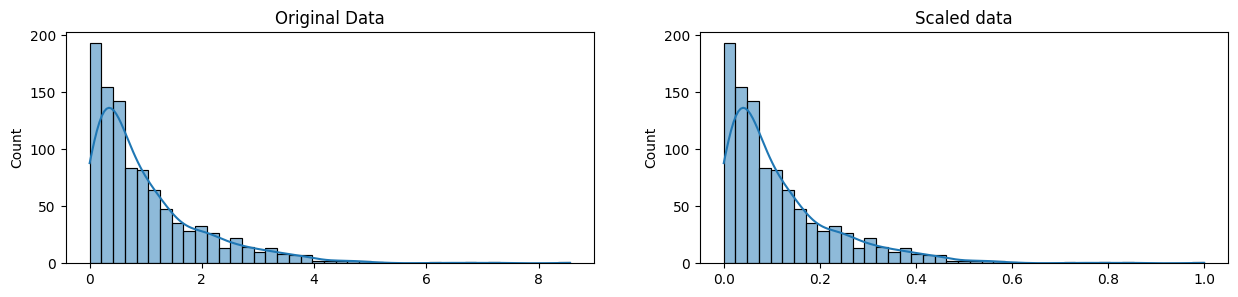

In [ ]:
subset_nfl_data=original_data
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(subset_nfl_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(subset_nfl_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

In [ ]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

#plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(subset_nfl_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

NameError: ignored

ValueError: ignored